# Toxic Comment Classification

train.csv - the training set, contains comments with their binary label
id,"comment_text","toxic","severe_toxic","obscene","threat","insult", "identity_hate"

test.csv - the test set, you must predict the toxicity probabilities for these comments. To deter hand labeling, the
test set contains some comments which are not included in scoring.
id,comment_text

sample_submission.csv - a sample submission file in the correct format
id,toxic,severe_toxic,obscene,threat,insult,identity_hate

test_labels.csv - labels for the test data; value of -1 indicates it was not used for scoring; (Note: file added after competition close!)
id,toxic,severe_toxic,obscene,threat,insult,identity_hate

In [1]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('omw-1.4')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\bouke\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bouke\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bouke\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bouke\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\bouke\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [5]:
# data transformation
test_dataframe = pd.read_csv("test.csv")
train_dataframe = pd.read_csv("train.csv")
df = train_dataframe

In [3]:
# data preprocessing function
def data_preprocessing(dataframe):
    # get lower comment text,replace line breaks with spaces and keep only letters and spaces
    for k, v in dataframe["comment_text"].items():
        v = v.lower()
        v = re.sub(r'\n', ' ', v)
        v = re.sub(r'[^a-z ]', '', v)
        dataframe["comment_text"][k] = v
    print("Keep only lower letters and spaces : ")
    print(dataframe["comment_text"][0])

    # tokenize comment text
    for k, v in dataframe["comment_text"].items():
        tokenizer = nltk.RegexpTokenizer(r'\w+')
        token = tokenizer.tokenize(v)
        dataframe["comment_text"][k] = token
    print("Tokenize comment text : ")
    print(dataframe["comment_text"][0])

    # remove stop words
    stop_words = nltk.corpus.stopwords.words('english')
    for k, v in dataframe["comment_text"].items():
        filtered_sentence = [w for w in v if not w in stop_words]
        dataframe["comment_text"][k] = filtered_sentence
    print("Remove stop words : ")
    print(dataframe["comment_text"][0])

    # lemmentize comment text
    word_lemmatizer = WordNetLemmatizer()
    for k, v in dataframe["comment_text"].items():
        lemmatized_sentence = [word_lemmatizer.lemmatize(w) for w in v]
        dataframe["comment_text"][k] = lemmatized_sentence
    print("Lemmentize comment text : ")
    print(dataframe["comment_text"][0])
    return dataframe

In [4]:
df = data_preprocessing(train_dataframe)

C:\Users\bouke\AppData\Local\Temp\ipykernel_10444\2737754235.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["comment_text"][k] = v


KeyboardInterrupt: 

In [ ]:
# model architecture

In [ ]:
# training

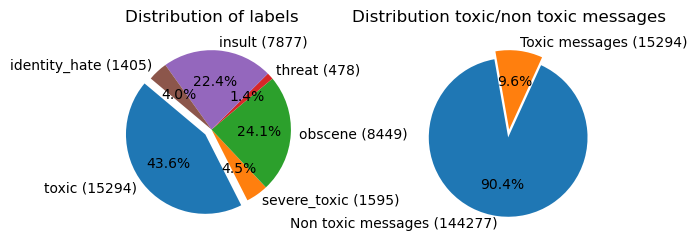

In [28]:
# data visualization
# show the distribution of the labels with a pie chart
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
sizes = [df['toxic'].sum(), df['severe_toxic'].sum(), df['obscene'].sum(), df['threat'].sum(), df['insult'].sum(),
         df['identity_hate'].sum()]
explode = (0.1, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
# add number of comments to the labels
for i in range(len(labels)):
    labels[i] = labels[i] + ' (' + str(sizes[i]) + ')'


# show distribution between comments with and without labels
labels2 = ['Non toxic messages', 'Toxic messages']
sizes2 = [len(df) - df['toxic'].sum(), df['toxic'].sum()]
explode2 = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
# add number of comments to the labels
for i in range(len(labels2)):
    labels2[i] = labels2[i] + ' (' + str(sizes2[i]) + ')'

# plot both pie charts
fig, (ax1, ax2) = plt.subplots(1, 2)
#first plot
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140)
ax1.set_title('Distribution of labels')
# add distance between the two pie charts
fig.subplots_adjust(wspace=0.5)
# second plot
ax2.pie(sizes2, explode=explode2, labels=labels2, autopct='%1.1f%%', startangle=100)
ax2.set_title('Distribution toxic/non toxic messages')
plt.show()


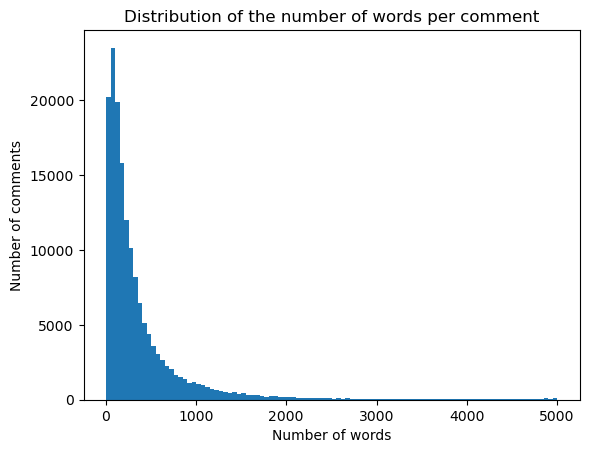

In [29]:
# plot the distribution of the number of words per comment
# get the number of words per comment
number_of_words = []
for k, v in df["comment_text"].items():
    number_of_words.append(len(v))
# plot the distribution
plt.hist(number_of_words, bins=100)
plt.title('Distribution of the number of words per comment')
plt.xlabel('Number of words')
plt.ylabel('Number of comments')
plt.show()

) missing from current font.\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


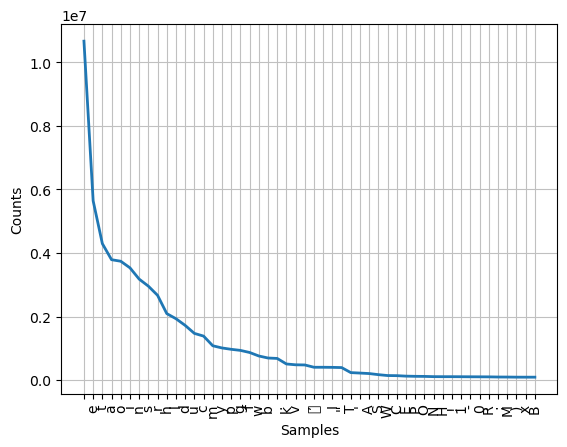

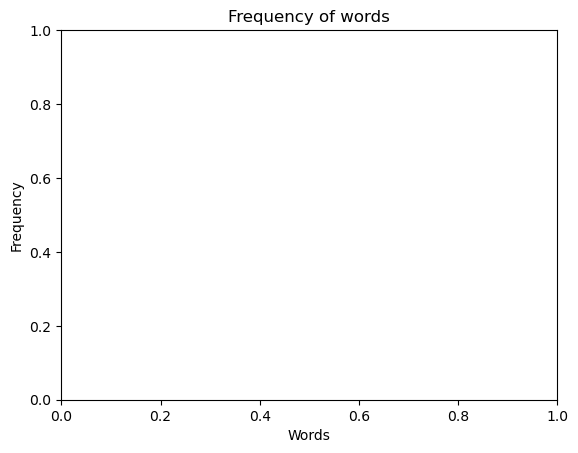

In [30]:
# plot frequency of words
# get all words
all_words = []
for k, v in df["comment_text"].items():
    for word in v:
        all_words.append(word)
# get the frequency of each word
word_freq = nltk.FreqDist(all_words)
# plot the 50 most common words
word_freq.plot(50, cumulative=False)
plt.title('Frequency of words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()